In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../python')
from functions import *
from models import *
import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "3" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Load data

In [2]:
save_folder = "gd1_bulk"

if save_folder is not None: 
    os.makedirs(save_folder, exist_ok=True)

In [3]:
df_fullpatch = load_file()
df = df_fullpatch
# df = pd.read_hdf("../gaia_data/gd1/gaiascan_l207.0_b50.2_ra148.6_dec24.2.h5")

df = df[df.g < 20.2] # reduces streaking 

100%|██████████| 1985/1985 [00:46<00:00, 42.25it/s]


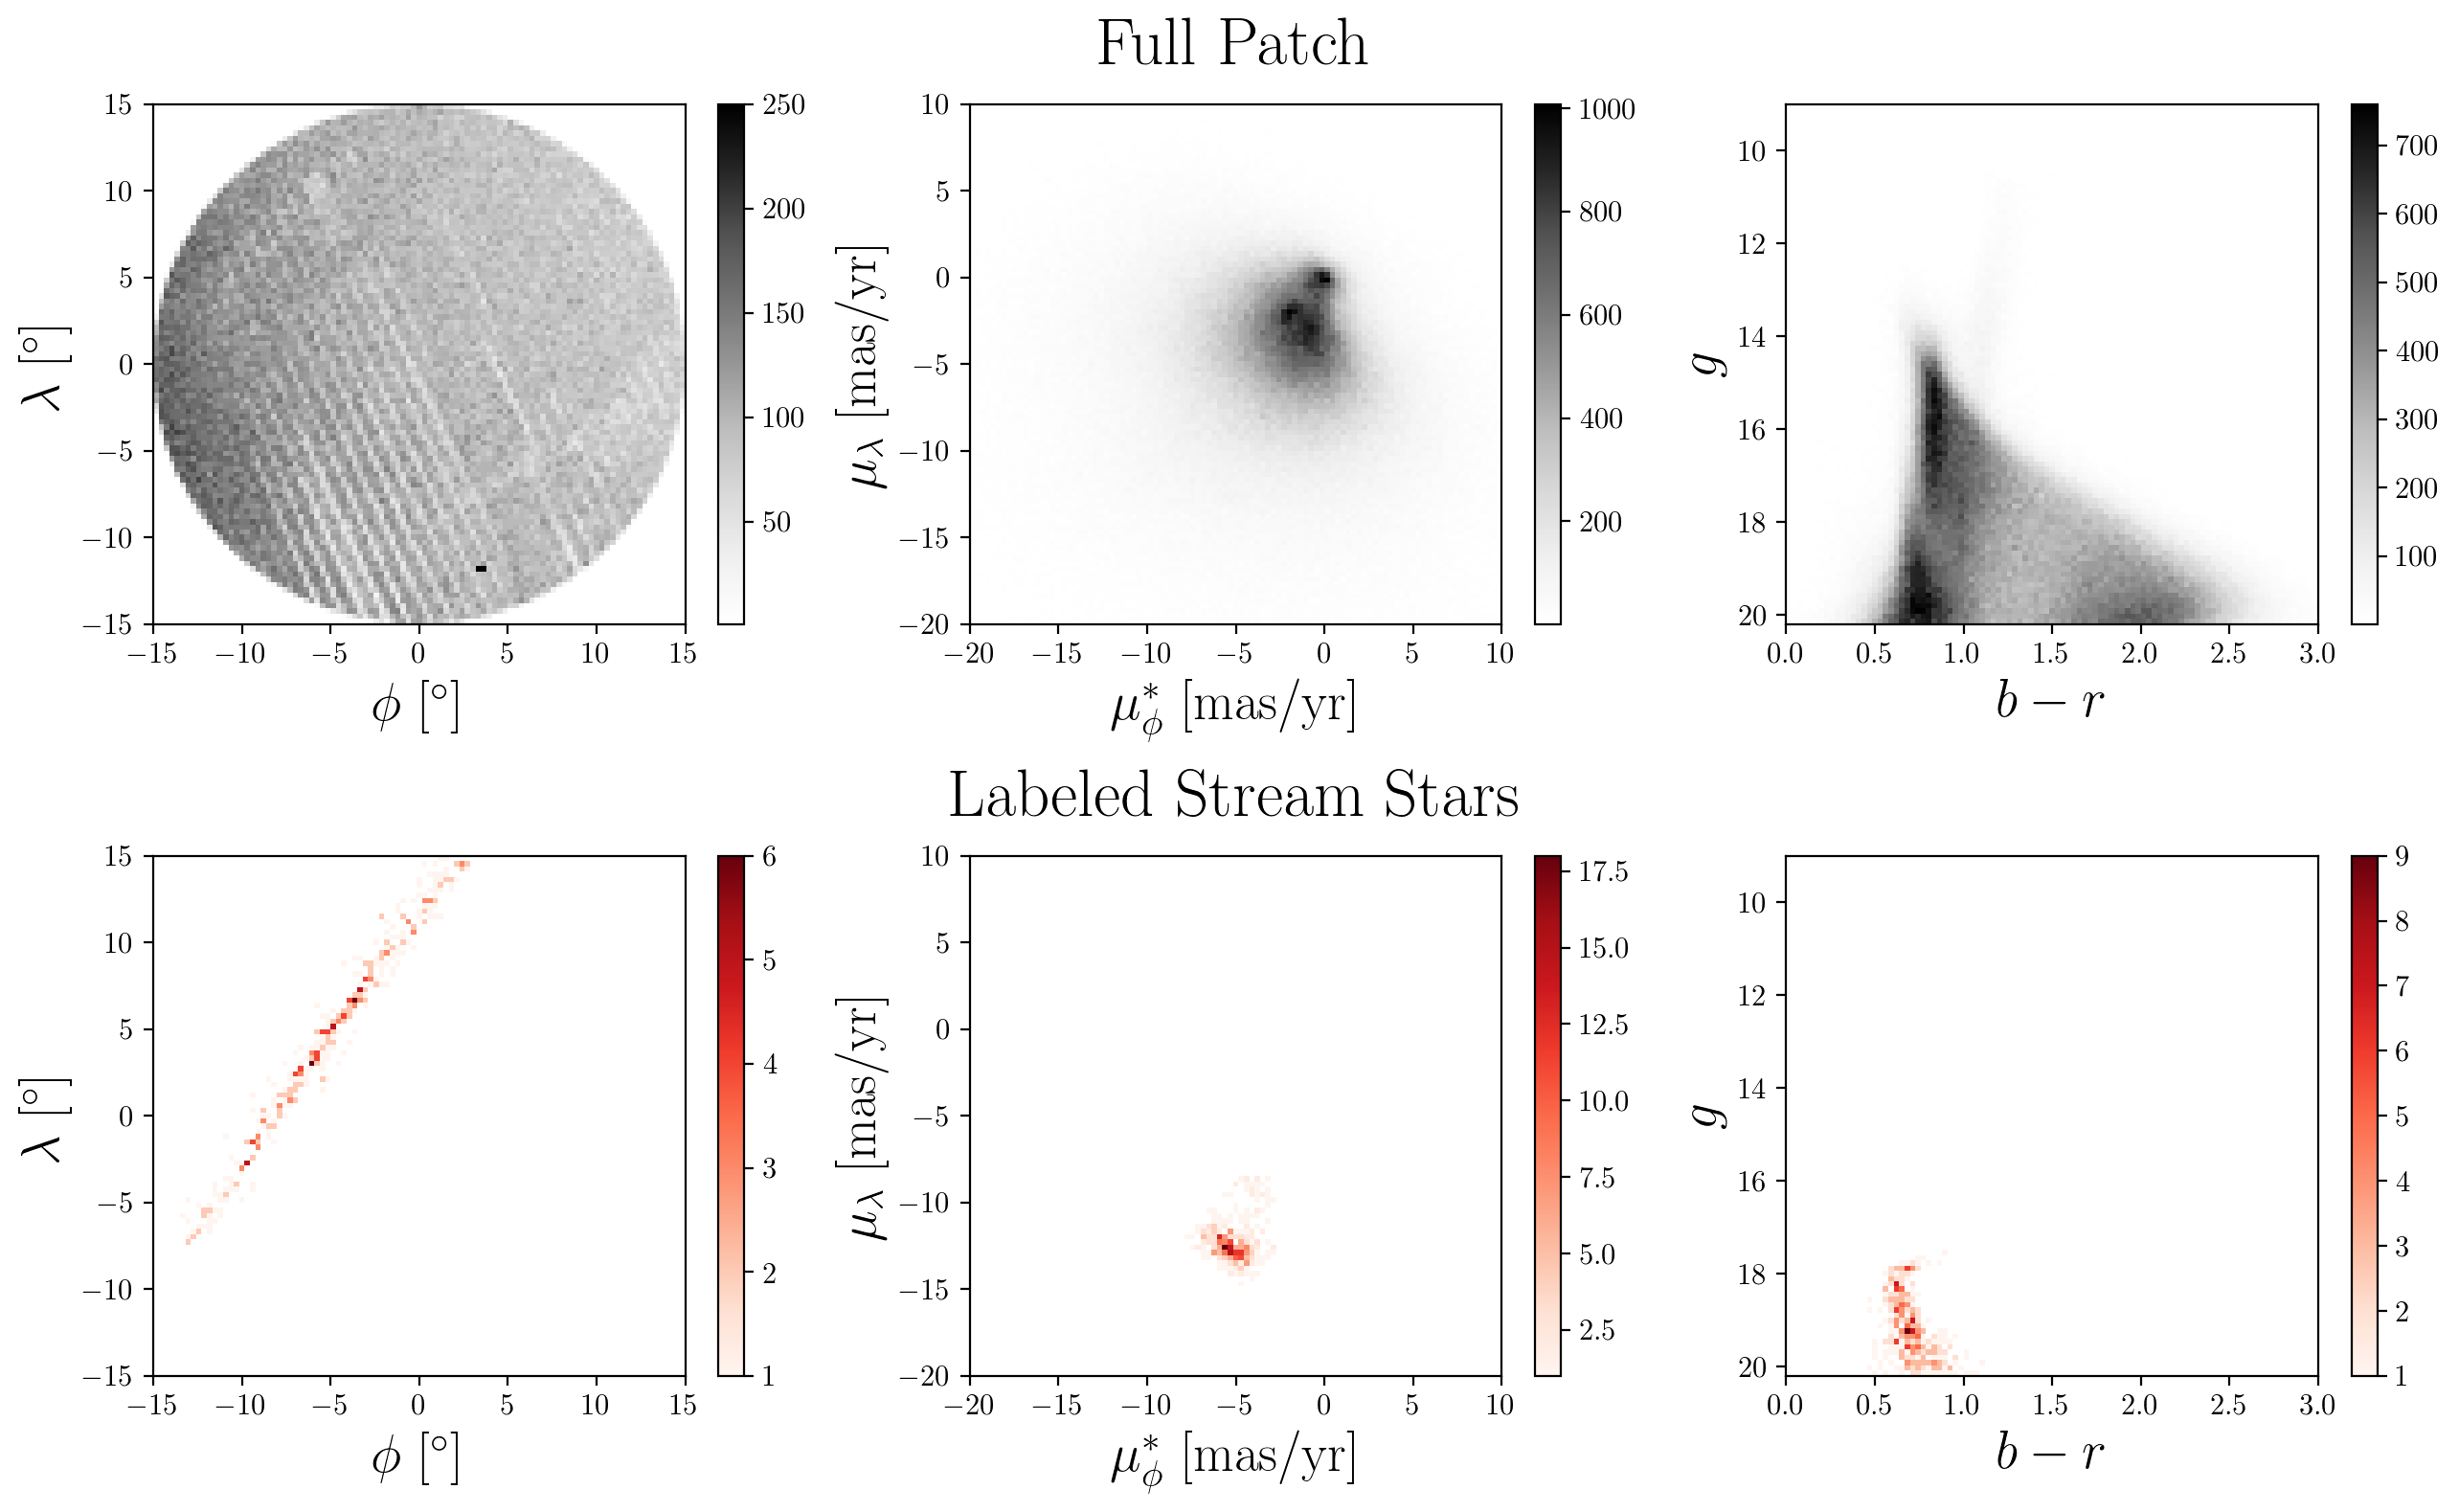

In [4]:
make_plots(df, save_folder = save_folder)

SR factor: 1
SB factor: 3
Scanning over μ_λ
Sideband region: [-15.8,-13.6) & (-11.4,-9.2]
Signal region: [-13.6,-11.4]
Total counts: SR = 36,623, SB = 79,178
Signal region has 346 stream and 36,277 bkg events (0.95%).
Sideband region has 412 stream and 115,389 bkg events (0.36%).
f_sig = 2.7X f_sideband.


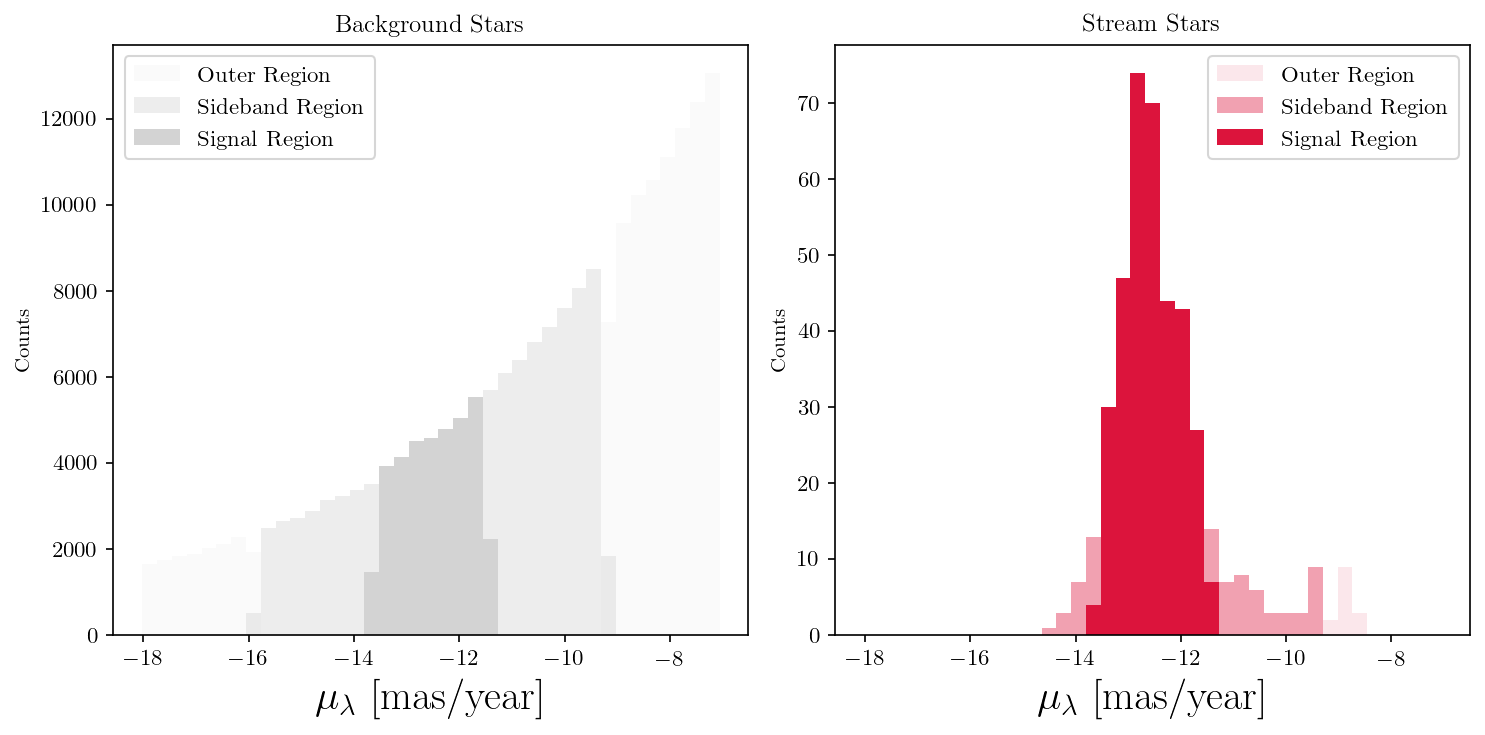

In [5]:
df_slice = signal_sideband(df, save_folder = save_folder)

# Train

2023-02-16 14:13:30.701521: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-16 14:13:31.123021: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 41432 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:c1:00.0, compute capability: 8.6
2023-02-16 14:13:32.345379: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


724/724 [==============================] - 1s 846us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
724/724 [==============================] - 1s 842us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
724/724 [==============================] - 1s 808us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
724/724 [==============================] - 1s 956us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
724/724 [==============================] - 1s 830us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...


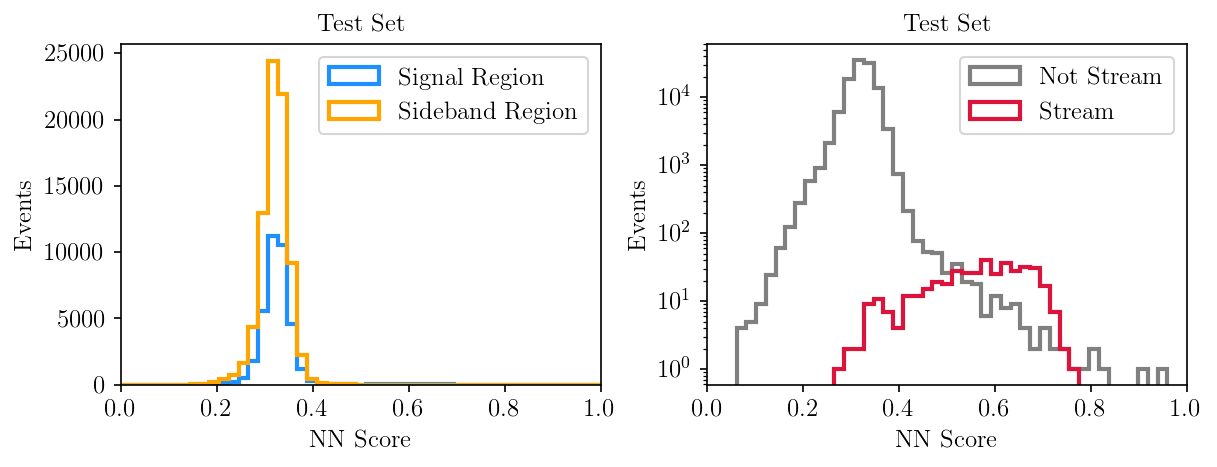

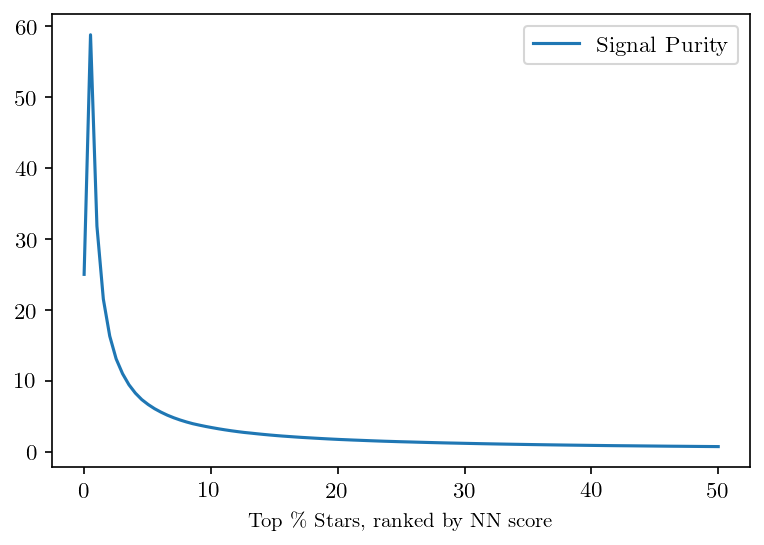

Top 50 stars: Purity = 68.0% 


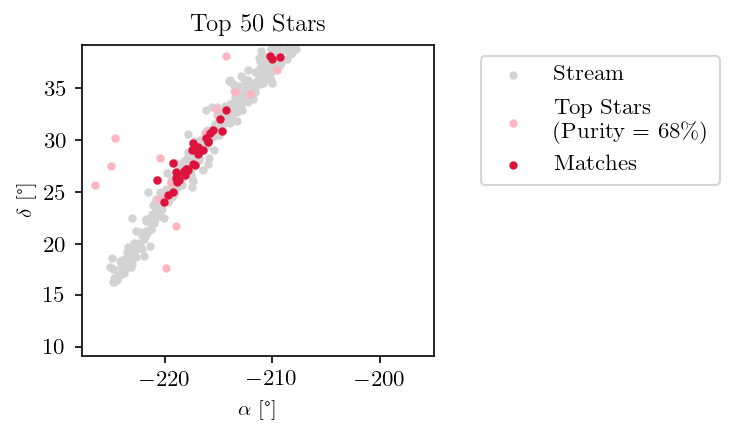

Top 100 stars: Purity = 80.0% 


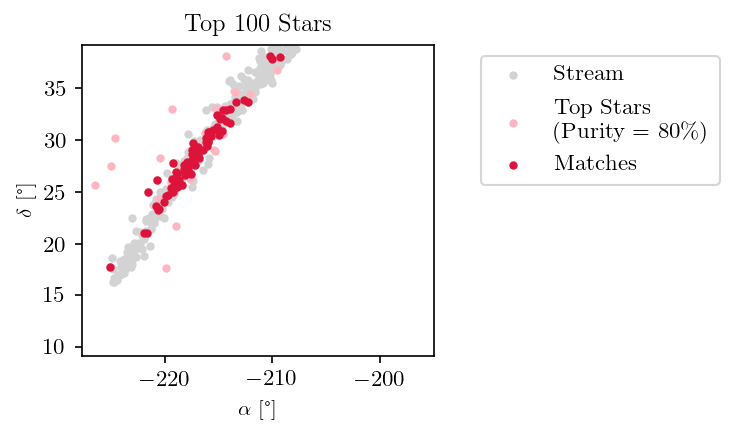

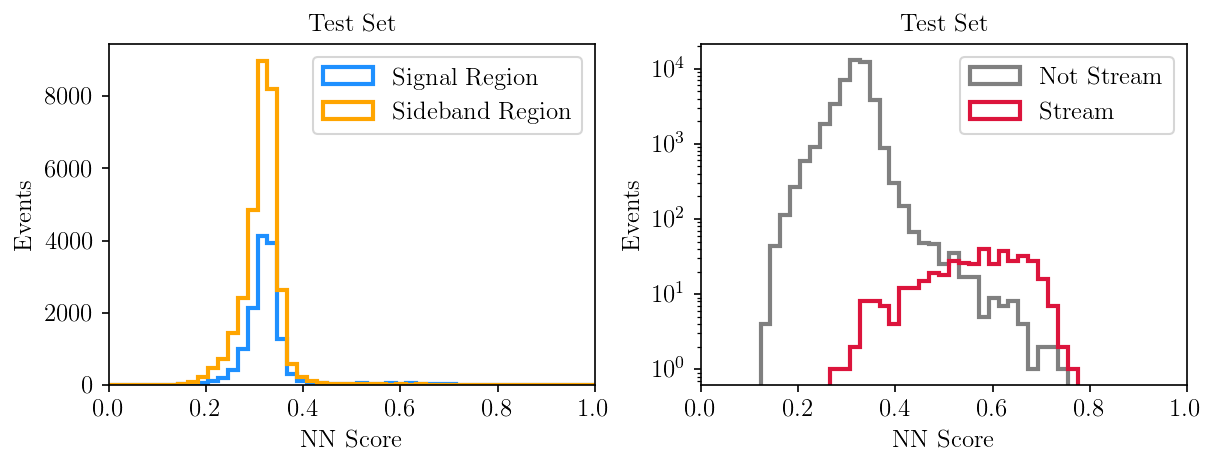

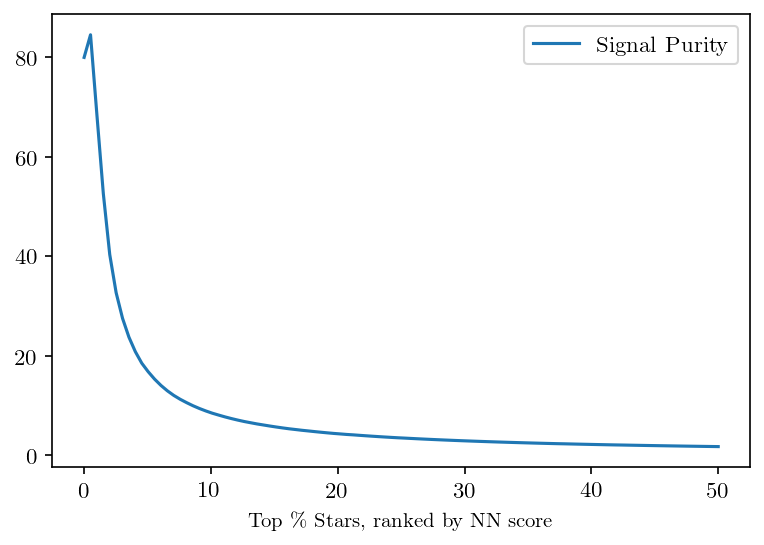

Top 50 stars: Purity = 88.0% 


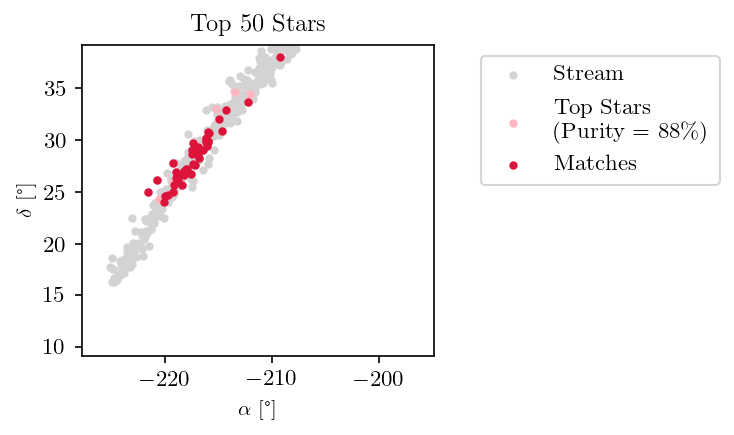

Top 100 stars: Purity = 89.0% 


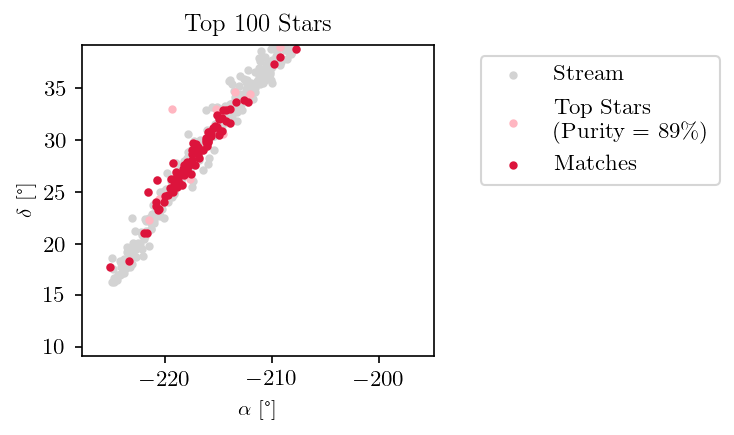

In [6]:
tf.keras.backend.clear_session()
test = train(df_slice, verbose=False, save_folder = save_folder)

# Do fiducial cuts help improve purity?

Train on a patch with no cuts applied, then see how the fiducial cuts improve the purity on the test set...

In [ ]:
test = pd.read_hdf("./gd1_bulk_nofiducialcuts/df_test.h5")

In [ ]:
plot_results(test)

In [ ]:
plot_results(test[test.g < 20.2])

In [ ]:
plot_results(test[(test['μ_λ']**2 + test['μ_ϕcosλ']**2) > 4])

In [ ]:
plot_results(test[(0.5 <= test['b-r']) & (test['b-r'] <= 1)])

In [ ]:
plot_results(test[(test.g < 20.2) & (0.5 <= test['b-r']) & (test['b-r'] <= 1)])

In [ ]:
plot_results(test[(test.g < 20.2) & (0.5 <= test['b-r']) & (test['b-r'] <= 1) & ((test['μ_λ']**2 + test['μ_ϕcosλ']**2) > 4)] )